In [ ]:
"""

SR University, Warangal, India.
Nural-Networks & Deep-Learning - Professional Elective - 2.
Mentor - V.Venkatramana, EEE department.
Assignment - 6
18K41A0564 

"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv("kc_house_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
d=np.abs(stats.zscore(data['price']))
print(d)

[0.86671733 0.00568792 0.98084935 ... 0.37586519 0.38158814 0.58588173]


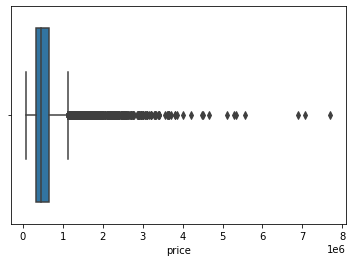

In [ ]:
sns.boxplot(x=data['price'])

In [ ]:
df = pd.DataFrame(data=data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
x = df
df.drop(['date'],axis=1)
for i in df:
    if i != 'date':
        q = df[i].quantile(0.99)
        df[df[i] < q]
        q_low = df[i].quantile(0.01)
        q_hi  = df[i].quantile(0.99)

        df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
        
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('No outliners')
data = df_filtered

21613
21178


In [ ]:
data_n = data.copy()
for i in data:
    if i!='date':
        data_n[i] = data[i].copy()
        data_n[i] = (data_n[i] - data_n[i].min())/(data_n[i].max() - data_n[i].min())
data_n.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.004338,0.0,0.0,0.0,...,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.215000,0.153043,0.028583
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.005705,0.4,0.0,0.0,...,0.500000,0.219370,0.082988,0.443478,0.988089,0.626263,0.908959,0.163333,0.213913,0.041339
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.008074,0.0,0.0,0.0,...,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.235000,0.393043,0.044052
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.003779,0.0,0.0,0.0,...,0.500000,0.088681,0.188797,0.565217,0.000000,0.681818,0.586939,0.101667,0.156522,0.024415
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.006425,0.0,0.0,0.0,...,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.391667,0.233043,0.040467


In [ ]:
train_data,test_data = train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

19060


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
692,0.141590,20140721T000000,0.037364,0.121212,0.28125,0.185374,0.006097,0.4,0.0,0.0,...,0.583333,0.254376,0.000000,0.721739,0.0,0.287879,0.457938,0.311667,0.325217,0.043564
6239,0.297505,20150302T000000,0.016393,0.090909,0.25000,0.074830,0.008118,0.0,0.0,0.0,...,0.500000,0.102684,0.000000,0.495652,0.0,0.994949,0.429468,0.159167,0.170435,0.055198
12634,0.022736,20150102T000000,0.054361,0.090909,0.21875,0.153061,0.055797,0.0,0.0,0.0,...,0.583333,0.121354,0.157676,0.669565,0.0,0.358586,0.975068,0.323333,0.346087,0.294908
10903,0.222699,20150108T000000,0.033639,0.121212,0.21875,0.119898,0.012159,0.0,0.0,0.0,...,0.500000,0.065344,0.176349,0.478261,0.0,0.025253,0.676050,0.310000,0.212174,0.058084
21131,0.699768,20140626T000000,0.059016,0.121212,0.34375,0.232993,0.005175,0.4,0.0,0.0,...,0.583333,0.319720,0.000000,0.965217,0.0,0.292929,0.523725,0.302500,0.446957,0.054043


In [ ]:
dtx = np.array(train_data['sqft_living'])
dty = np.array(train_data['price'])

In [ ]:
from sympy import * 
#step-1
bs=2
m0=1
c0=-1
epochs=1
learningrate=0.1
ns=len(dtx)
nb=ns//bs

#step-2
x=Symbol('x')
y=Symbol('y')
m=Symbol('m')
c=Symbol('c')
E=(0.5)*(y-(m*x)-c)**2
fx=x**2+y**2+10
Em=E.diff(m)
Ec=E.diff(c)
err=[]
for itr in range(0,epochs):  #step-9
 for b in range(0,nb):       #step-8
  er=0
  dfEm1=0
  dfEc1=0
  for i in range(0,bs):      #step-7
    j=b*bs+i
    er+=((dty[i]-(m0*dtx[i])-c0))**2
    #step-4
    dfEm=Em.subs(m,m0)
    dfEm=dfEm.subs(c,c0) 
    dfEm=dfEm.subs(x,dtx[j]) 
    dfEm=dfEm.subs(y,dty[j])
    dfEm=round(dfEm,2)
    dfEc=Ec.subs(m,m0)
    dfEc=dfEc.subs(c,c0) 
    dfEc=dfEc.subs(x,dtx[j]) 
    dfEc=dfEc.subs(y,dty[j])
    dfEc=round(dfEc,2)
    dfEm1+=dfEm
    dfEc1+=dfEc
  #step-5
  dfEm1 = dfEm1/bs
  dfEc1 = dfEc1/bs
  dfEm1 = round(dfEm1,2)
  dfEc1 = round(dfEc1,2)
  cm=(-1.0)*learningrate*dfEm1
  cc=(-1.0)*learningrate*dfEc1
 
  #step-6
  m0=m0+cm
  c0=c0+cc
  m0=round(m0,2)
  c0=round(c0,2)
  er = (1/(2*len(train_data['sqft_living'])))*(er)
  err.append(er)
#step-10
print('Minimum value is at m=',m0)
print('Minimum value is at c=',c0)

Minimum value is at m= 0.84
Minimum value is at c= -0.08


In [ ]:
train_data_pred = [i for i in dtx]
for k in range(len(dtx)):
    train_data_pred[k]=(m0*dtx[k]+c0)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dty,train_data_pred)
mse

0.0023213583243862717

Text(0.5, 1.0, 'predicted vs actual(Data)')

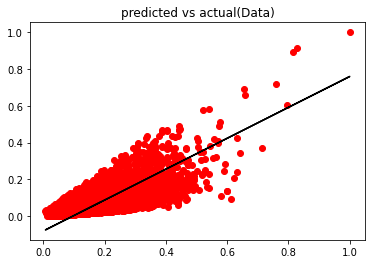

In [ ]:
plt.plot(np.array(train_data['sqft_living']),np.array(train_data_pred),'black')
plt.scatter(np.array(train_data['sqft_living']),np.array(train_data['price']),color='red')
plt.title('predicted vs actual(Data)')

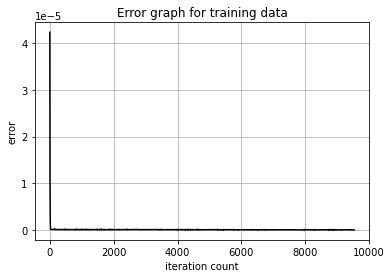

In [ ]:
iters = np.arange(epochs*nb)
plt.plot(iters,err,'black')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()


In [ ]:
dtx = np.array(test_data['sqft_living'])
dty = np.array(test_data['price'])

test_data_pred = [i for i in dtx]
for k in range(len(dtx)):
    test_data_pred[k]=(m0*dtx[k] + c0)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dty,test_data_pred)
mse

0.0023387236982043086

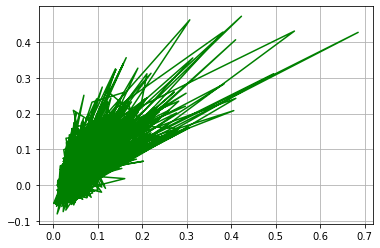

In [ ]:
plt.plot(test_data['price'],test_data_pred,'green')
plt.grid() 

In [ ]:
x_min = data['sqft_living'].min()
x_max = data['sqft_living'].max()
y_min = data['price'].min()
y_max = data['price'].max()
x0 = float(input("enter sqrt feet value :"))

x0= (x0 - x_min)/(x_max - x_min)
y = m0*x0+c0
y = y*(y_max - y_min) + y_min
print(f"Price  is : {y}")

enter sqrt feet value :2375
Price  is : 599773.422552615
